# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
% matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [3]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,numpy

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
pandas 0.24.1
numpy 1.16.0
Sat Nov 16 17:01:05 2019 W. Europe Standard Time

# 2)- Load data

In [4]:
df=pd.read_json('books_small_10000.json', lines=True,  orient='records')

In [5]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00GDM3NQC,"[0, 0]",5,"I bought both boxed sets, books 1-5. Really a great series! Start book 1 three weeks ago and just finished book 5. Sloane Monroe is a great character and being able to follow her through both p...","01 23, 2014",A1F2H80A1ZNN1N,Connie Correll,Can't stop reading!,1390435200
1,B00A5MREAM,"[0, 0]",3,I enjoyed this short book. But it was way way to short ....I can see how easily it would have been to add several chapters.,"05 9, 2014",AI3DRTKCSK4KX,Grandma,A leaf on the wind of all hallows,1399593600
2,0446547573,"[1, 1]",4,I love Nicholas Sparks. I&#8217;ve read everything he&#8217;s written and couldn&#8217;t wait for my copy of Safe Haven to arrive.Safe Haven had a different feel than many of Nicholas Sparks books...,"07 5, 2014",A3KAKFHY9DAC8A,"toobusyreading ""Inspired Kathy""",Great writing from Nicholas Sparks.,1404518400
3,0955809215,"[0, 0]",4,I really enjoyed this adventure and look forward to reading more of Robert Spire. I especially liked all the info on global warming. You did a good job on the research.,"01 9, 2014",ATYBCYD6BIXVL,Chrissie,great,1389225600
4,0991500776,"[0, 0]",3,"It was a decent read.. typical story line. Nothing unsavory as so many are. Just a slice of life, plausible.","07 9, 2014",A17K95SEU3J68U,"Sirde ""artist761""",It was a decent read.. typical story line ...,1404864000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
asin              10000 non-null object
helpful           10000 non-null object
overall           10000 non-null int64
reviewText        10000 non-null object
reviewTime        10000 non-null object
reviewerID        10000 non-null object
reviewerName      9957 non-null object
summary           10000 non-null object
unixReviewTime    10000 non-null int64
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


In [7]:
df.shape

(10000, 9)

In [8]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

In [9]:
table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
overall,int64
unixReviewTime,int64
asin,object
helpful,object
reviewText,object
reviewTime,object
reviewerID,object
reviewerName,object
summary,object


In [10]:
review= df.loc[:, ['reviewText','overall']]

In [11]:
review.head()

,reviewText,overall
0,"I bought both boxed sets, books 1-5. Really a great series! Start book 1 three weeks ago and just finished book 5. Sloane Monroe is a great character and being able to follow her through both p...",5
1,I enjoyed this short book. But it was way way to short ....I can see how easily it would have been to add several chapters.,3
2,I love Nicholas Sparks. I&#8217;ve read everything he&#8217;s written and couldn&#8217;t wait for my copy of Safe Haven to arrive.Safe Haven had a different feel than many of Nicholas Sparks books...,4
3,I really enjoyed this adventure and look forward to reading more of Robert Spire. I especially liked all the info on global warming. You did a good job on the research.,4
4,"It was a decent read.. typical story line. Nothing unsavory as so many are. Just a slice of life, plausible.",3


In [12]:
review.overall.value_counts()

5    5930
4    2448
3     978
2     375
1     269
Name: overall, dtype: int64

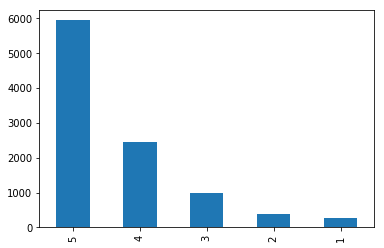

In [13]:
review.overall.value_counts().plot(kind='bar')

**5 being excellent and 1 being very poor**

# 3)- Preprocess data

In [14]:
X=review.reviewText
y=review.overall

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y ,test_size=0.33, random_state=42)


In [17]:
print(X_train.shape)
print(X_test.shape)

(6700,)
(3300,)


### 3.1)-vectorization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(X_train)

test_x_vectors = vectorizer.transform(X_test)

In [28]:
print(train_x_vectors[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


# 4)- Models

### 4.1)- SVM

In [29]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
clf_svm.predict(test_x_vectors[0])

array([5], dtype=int64)

**meaning excellent review**

### 4.2)- Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
test_x_vectors[0]

<1x26615 sparse matrix of type '<class 'numpy.float64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [34]:
clf_dec.predict(test_x_vectors[0])

array([5], dtype=int64)

### 4.3)-Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
clf_gnb.predict(test_x_vectors[0])

array([5], dtype=int64)

### 4.4)- Logistic Model

In [40]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
clf_log.predict(test_x_vectors[0])

array([5], dtype=int64)

# 5)- Evaluate

### a)- Mean accuracy

In [43]:
print(clf_svm.score(test_x_vectors, y_test))
print(clf_dec.score(test_x_vectors, y_test))
print(clf_gnb.score(test_x_vectors, y_test))
print(clf_log.score(test_x_vectors, y_test))

0.6409090909090909
0.49393939393939396
0.503030303030303
0.633030303030303


SVM is winner

### b)- out of sample 

In [45]:
test_set = ['very fun', "bad book do not buy", 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array([5, 1, 1], dtype=int64)

meaning 1st is excellent review, other two are poor reviews

# 6)- Tuning the model 

- with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, y_train)

In [ ]:
print(clf.score(test_x_vectors, y_test))